In [1]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
X, y = mglearn.datasets.make_forge()

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape (26, 2)


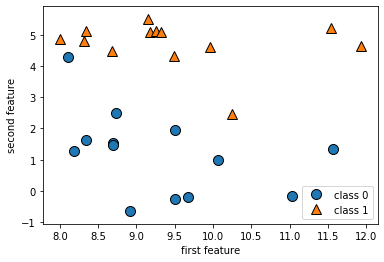

In [3]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape", X.shape)

Text(0, 0.5, 'target')

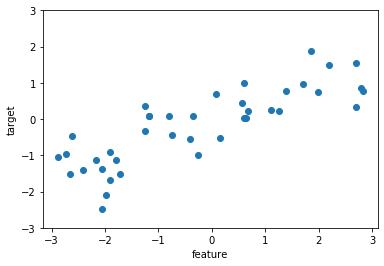

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("feature")
plt.ylabel("target")

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("shape of cancer's data", cancer.data.shape)

shape of cancer's data (569, 30)


In [7]:
print("samples number of each class:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

samples number of each class:
 {'malignant': 212, 'benign': 357}


In [8]:
print("names of features:\n", cancer.feature_names)

names of features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("shape of data:", boston.data.shape)

shape of data: (506, 13)


In [10]:
X,y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


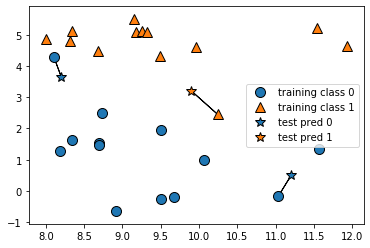

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


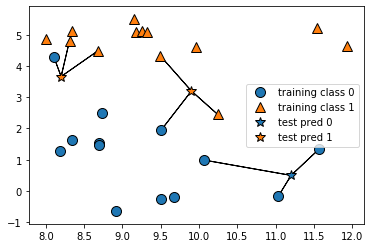

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=9)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [16]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [17]:
print("accuracy of the test set: {:.2f}".format(clf.score(X_test, y_test)))

accuracy of the test set: 0.86


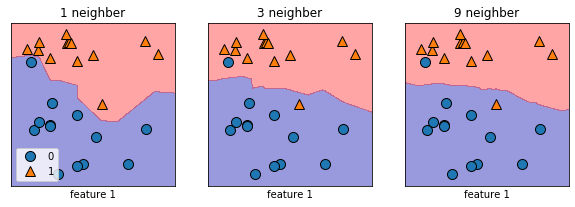

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill= True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighber".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
axes[0].legend(loc=3)

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [20]:
training_accuracy =[]
test_accuracy =[]
neighbors_settings = range(1,11)

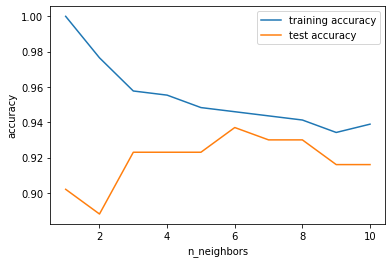

In [21]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

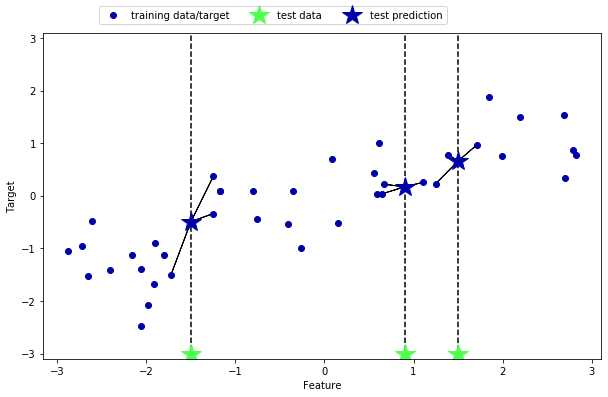

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3, weights='uniform')
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [25]:
print("prediction of test sets\n", reg.predict(X_test))

prediction of test sets
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
print("test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

test set R^2: 0.83


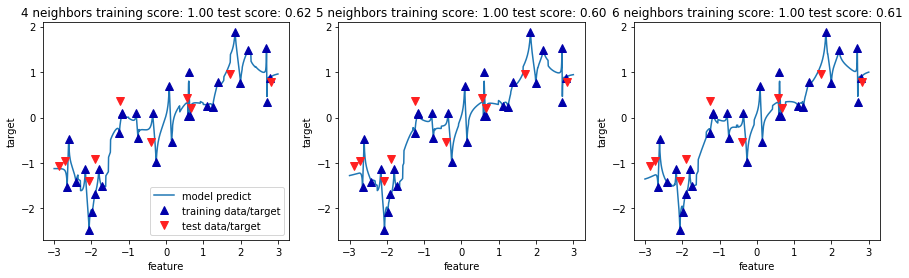

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([4,5,6], axes):
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', C=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbors training score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test,y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predict", "training data/target",
                "test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


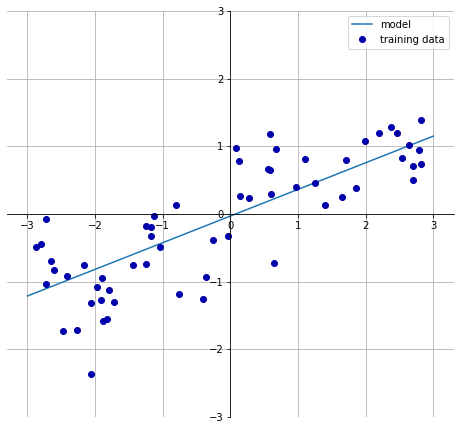

In [28]:
mglearn.plots.plot_linear_regression_wave()

In [29]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test =train_test_split(X, y, random_state=42)

lr=LinearRegression().fit(X_train, y_train)

In [30]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [31]:
print("point of traing sets: {:.2f}".format(lr.score(X_train, y_train)))
print("point of test sets: {:.2f}".format(lr.score(X_test, y_test)))

point of traing sets: 0.67
point of test sets: 0.66


In [32]:
X, y =mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("point of traing sets: {:.2f}".format(lr.score(X_train, y_train)))
print("point of test sets: {:.2f}".format(lr.score(X_test, y_test)))

point of traing sets: 0.95
point of test sets: 0.61


In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("point of traing sets: {:.2f}".format(ridge.score(X_train, y_train)))
print("point of test sets: {:.2f}".format(ridge .score(X_test, y_test)))

point of traing sets: 0.89
point of test sets: 0.75


In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("score of training set: {:.2f}".format(ridge10.score(X_train, y_train)))
print("score of test set: {:.2f}".format(ridge10.score(X_test, y_test)))

score of training set: 0.79
score of test set: 0.64


In [36]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("score of training set: {:.2f}".format(ridge10.score(X_train, y_train)))
print("score of test set: {:.2f}".format(ridge10.score(X_test, y_test)))

score of training set: 0.79
score of test set: 0.64


In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("score of training set: {:.2f}".format(ridge10.score(X_train, y_train)))
print("score of test set: {:.2f}".format(ridge10.score(X_test, y_test)))

score of training set: 0.79
score of test set: 0.64


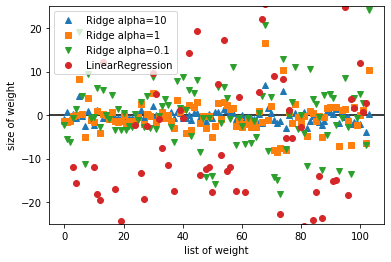

In [38]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("list of weight")
plt.ylabel("size of weight")
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

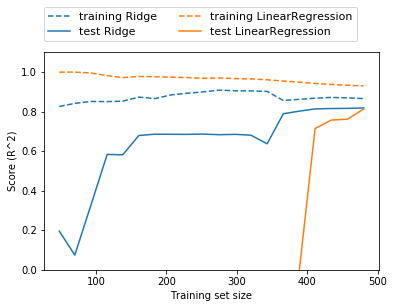

In [39]:
mglearn.plots.plot_ridge_n_samples()

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("score of train set:{:.2f}".format(lasso.score(X_train, y_train)))
print("score of test set:{:.2f}".format(lasso.score(X_test, y_test)))
print("number of used feature", np.sum(lasso.coef_ != 0))

score of train set:0.29
score of test set:0.21
number of used feature 4


In [41]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("score of training set: {:.2f}".format(lasso001.score(X_train,y_train)))

score of training set: 0.90


In [42]:
print("score of test set: {:.2f}".format(lasso001.score(X_test,y_test)))
print("number of used feature:",np.sum(lasso001.coef_ !=0))

score of test set: 0.77
number of used feature: 33


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("score of training set: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("score of test set: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("number of used feature:",np.sum(lasso00001.coef_ !=0))

score of training set: 0.95
score of test set: 0.64
number of used feature: 96


Text(0, 0.5, 'feature size')

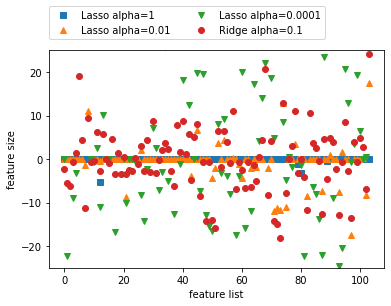

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel("feature list")
plt.ylabel("feature size")


C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


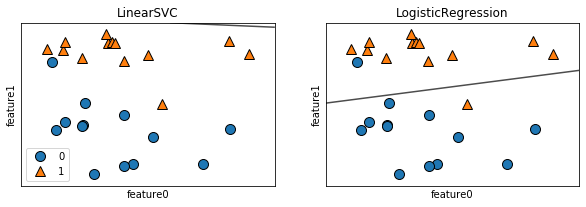

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(C=100000000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                     ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axes[0].legend()

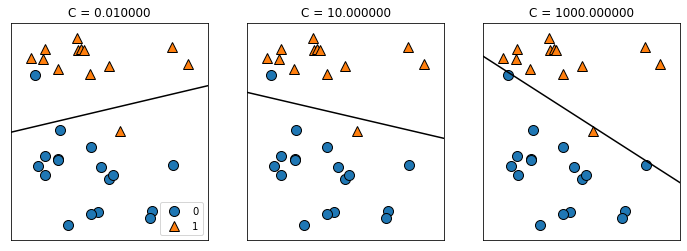

In [46]:
mglearn.plots.plot_linear_svc_regularization()

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(C=1000000).fit(X_train, y_train)
print("score of triaining set: {:.3f}".format(logreg.score(X_train, y_train)))
print("score of test set: {:.3f}".format(logreg.score(X_test, y_test)))

score of triaining set: 0.979
score of test set: 0.965


C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
logreg100 = LogisticRegression(C=100000).fit(X_train, y_train)
print("score of trainingset: {:.3f}".format(logreg100.score(X_train, y_train)))
print("score of testset: {:.3f}".format(logreg100.score(X_test, y_test)))

score of trainingset: 0.967
score of testset: 0.965


C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
logreg001 = LogisticRegression(C=100000000).fit(X_train, y_train)
print("score of trainingset: {:.3f}".format(logreg001.score(X_train, y_train)))
print("score of testset: {:.3f}".format(logreg001.score(X_test, y_test)))

score of trainingset: 0.979
score of testset: 0.965


C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


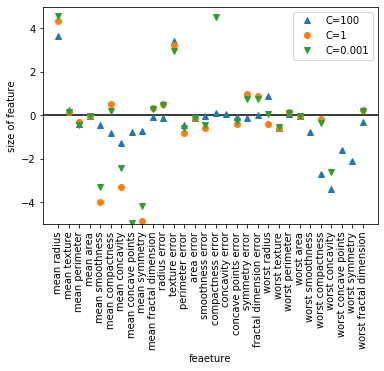

In [50]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feaeture")
plt.ylabel("size of feature")
plt.legend()

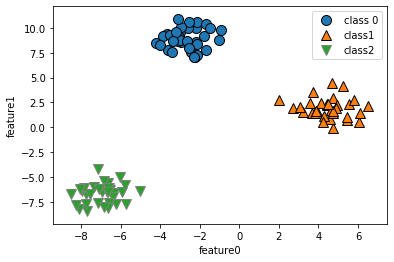

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")
plt.legend(["class 0", "class1", "class2"])

In [52]:
linear_svm = LinearSVC().fit(X, y)
print("size of the coef's matrix", linear_svm.coef_.shape)
print("size of the intercept's matrix", linear_svm.intercept_.shape)


size of the coef's matrix (3, 2)
size of the intercept's matrix (3,)


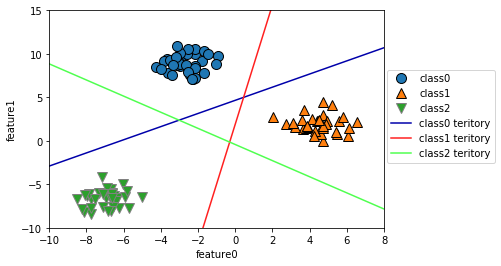

In [53]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("feature0")
    plt.ylabel("feature1")
    plt.legend(['class0','class1','class2','class0 teritory','class1 teritory','class2 teritory'], loc=(1.01,0.3))

Text(0, 0.5, 'feature1')

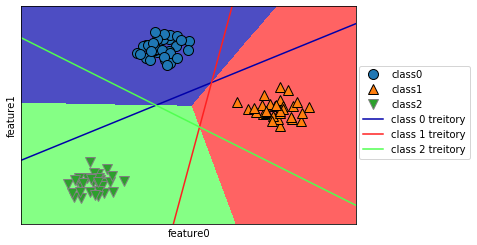

In [54]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                   mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
plt.legend(['class0','class1','class2','class 0 treitory','class 1 treitory','class 2 treitory'],loc=(1.01, 0.3))
plt.xlabel("feature0")
plt.ylabel("feature1")

In [55]:
logreg = LogisticRegression().fit(X_train, y_train)

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

C:\Users\segwo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])

y = np.array([0, 1, 0, 1])

In [59]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("feature count:\n",counts)

feature count:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [60]:
from sklearn.tree import DecisionTreeClassifier


In [61]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [62]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("accuracy for test set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy for training set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy for test set: 1.000
accuracy for training set: 0.937


In [63]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy for test set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy for training set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy for test set: 0.988
accuracy for training set: 0.951


In [64]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["b", "g"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

20.02.14

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

이라는 문제가 생겼음


==> 환경변수에 C:\Users\{user}\Anaconda3\Lib\site-packages\graphviz 를 추가한뒤 

Anaconda3\Library\bin\graphviz 경로의 내용을 복사하여 \Anaconda3\Lib\site-packages\graphviz 경로에 복사하여 문제 해결


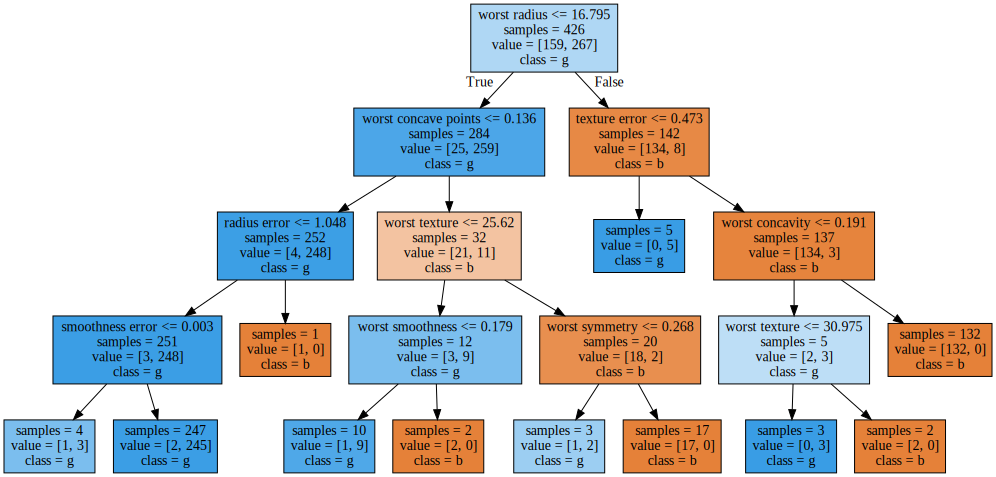

In [65]:
import graphviz

with open("tree.dot") as f:
        dg = f.read()
graphviz.Source(dg)

In [66]:
print("feature importence:\n", tree.feature_importances_)

feature importence:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


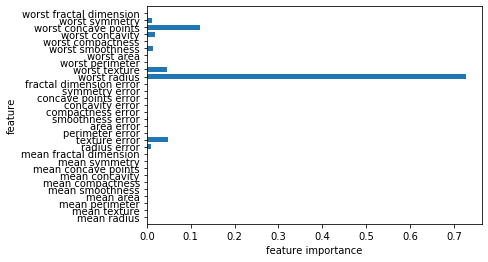

In [67]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


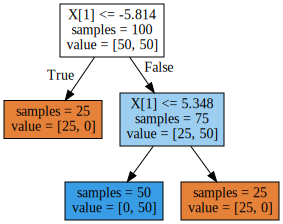

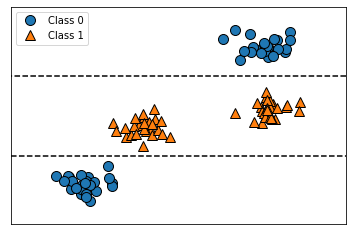

In [68]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'price (dolor/Mbyte)')

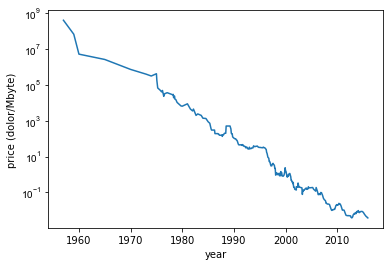

In [69]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price (dolor/Mbyte)")

In [70]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


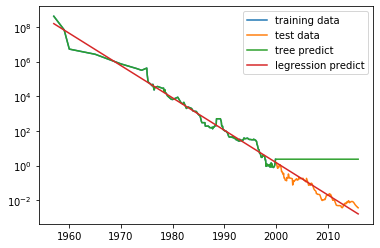

In [71]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree predict")
plt.semilogy(ram_prices.date, price_lr, label="legression predict")
plt.legend()

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [73]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

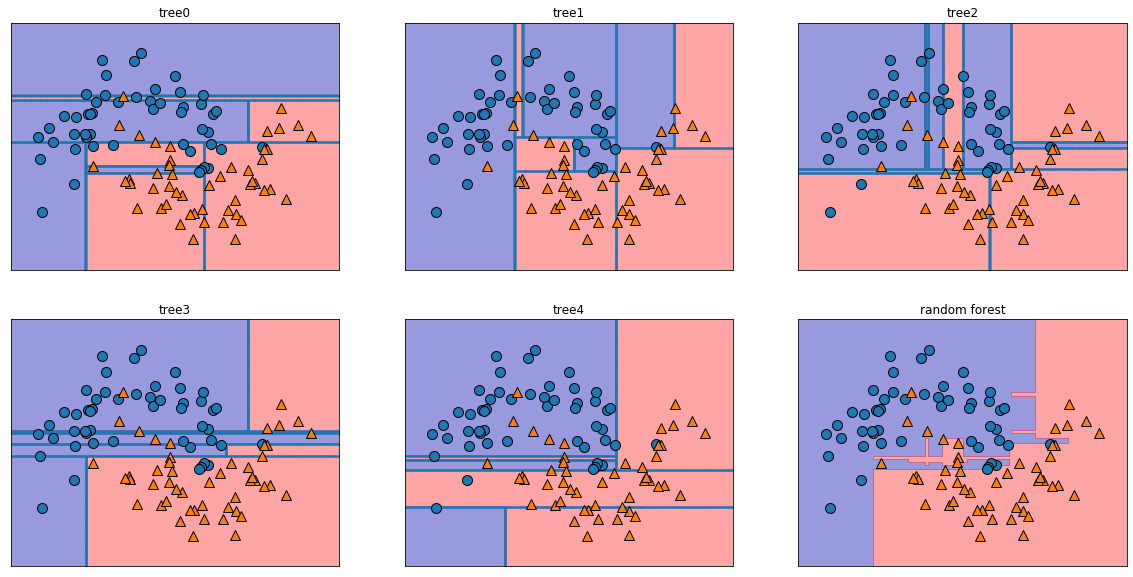

In [74]:
fig, axes =plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree{}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("random forest")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=8000, random_state=0)
forest.fit(X_train, y_train)

print("accuracy for trainset: {:.3f}".format(forest.score(X_train, y_train)))
print("accuracy for testset: {:.3f}".format(forest.score(X_test, y_test)))

accuracy for trainset: 1.000
accuracy for testset: 0.972


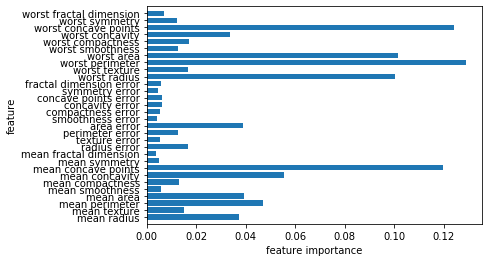

In [76]:
plot_feature_importances_cancer(forest)

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("accuracy for trainingset: {:.3f}".format(gbrt.score(X_train, y_train)))
print("accuracy fot testset: {:.3f}".format(gbrt.score(X_test, y_test)))

accuracy for trainingset: 1.000
accuracy fot testset: 0.965


In [78]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("accuracy for trainingset: {:.3f}".format(gbrt.score(X_train, y_train)))
print("accuracy fot testset: {:.3f}".format(gbrt.score(X_test, y_test)))

accuracy for trainingset: 0.991
accuracy fot testset: 0.972


In [79]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("accuracy for trainingset: {:.3f}".format(gbrt.score(X_train, y_train)))
print("accuracy fot testset: {:.3f}".format(gbrt.score(X_test, y_test)))

accuracy for trainingset: 0.988
accuracy fot testset: 0.965


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


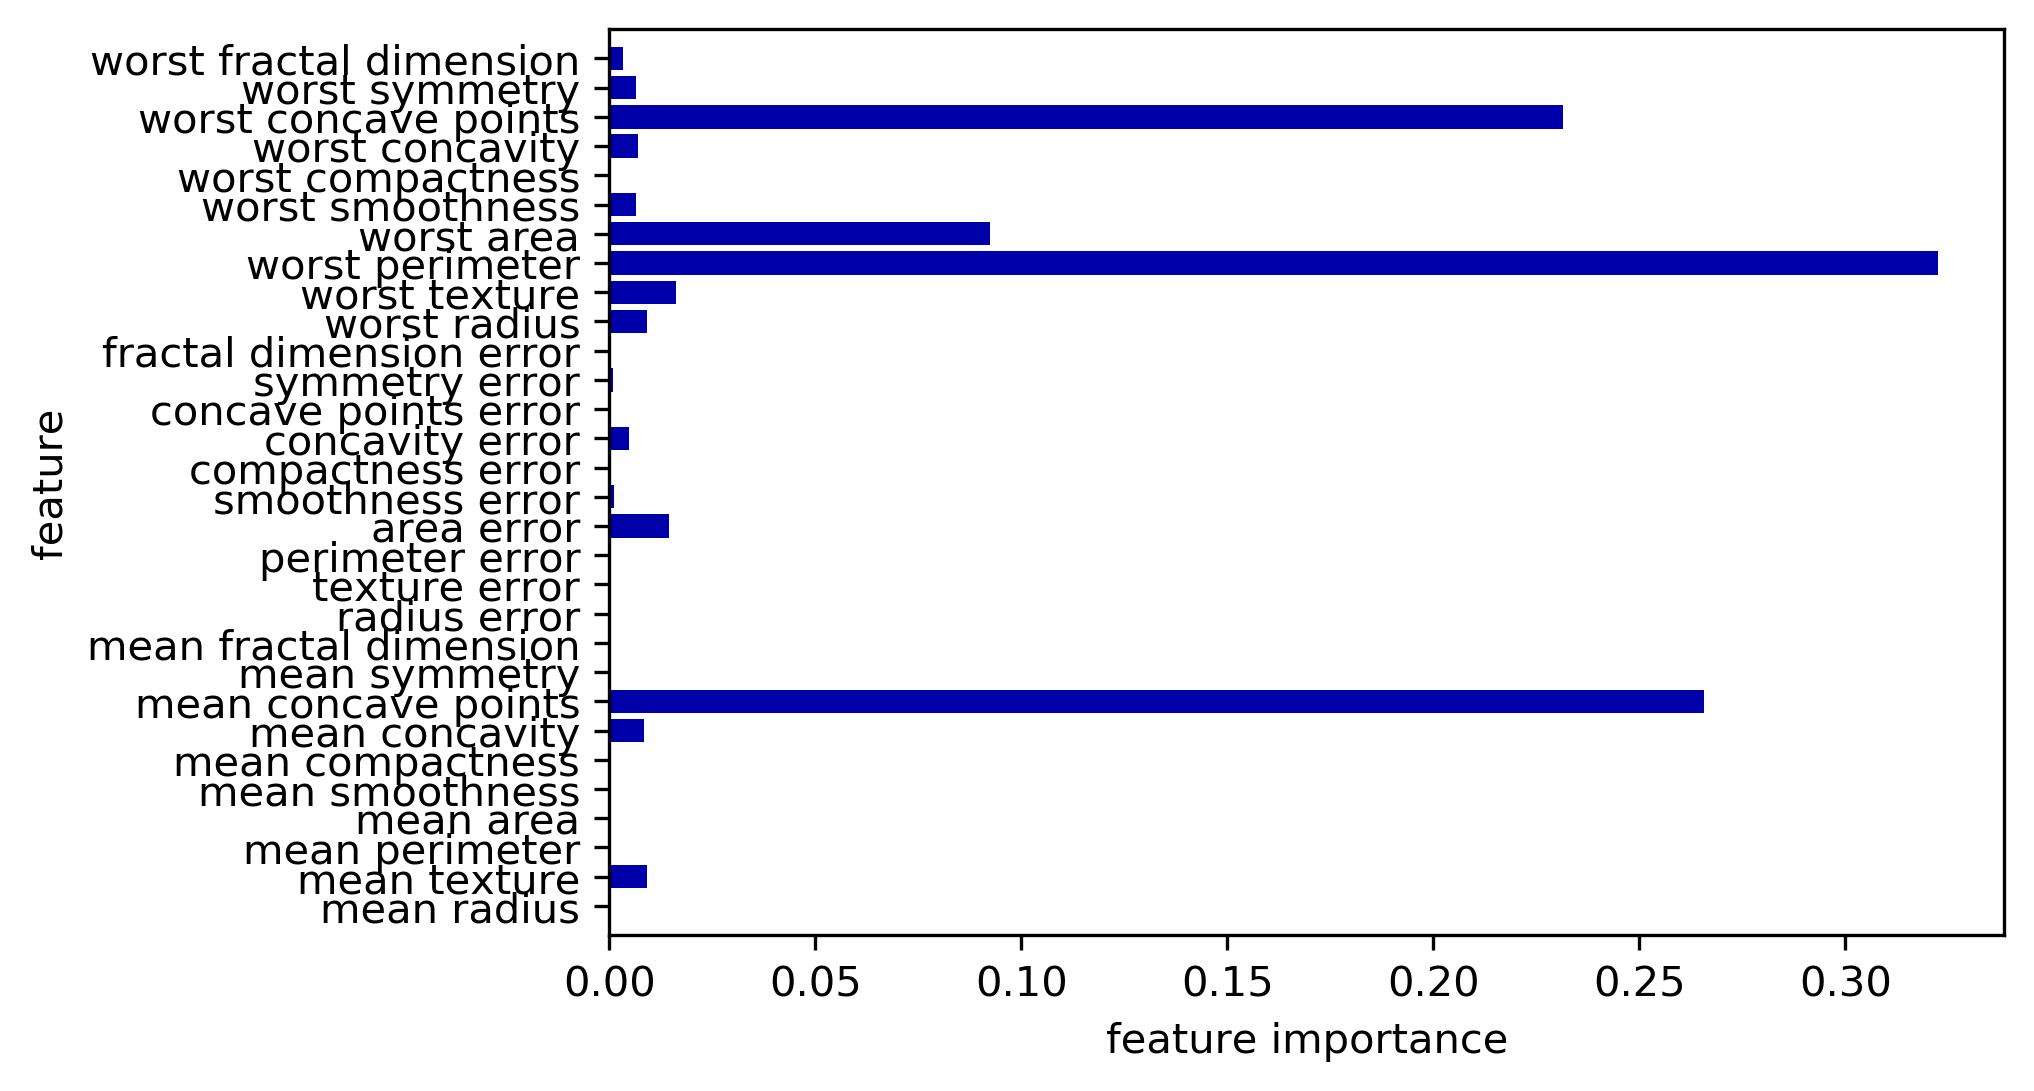

In [82]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [87]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100,
                             oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, verb

In [90]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.958
OOB 샘플의 정확도: 0.948


In [91]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                               n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\Users\segwo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\segwo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\segwo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\segwo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\segwo\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\segwo\Anaconda3\lib\site-packages\mat

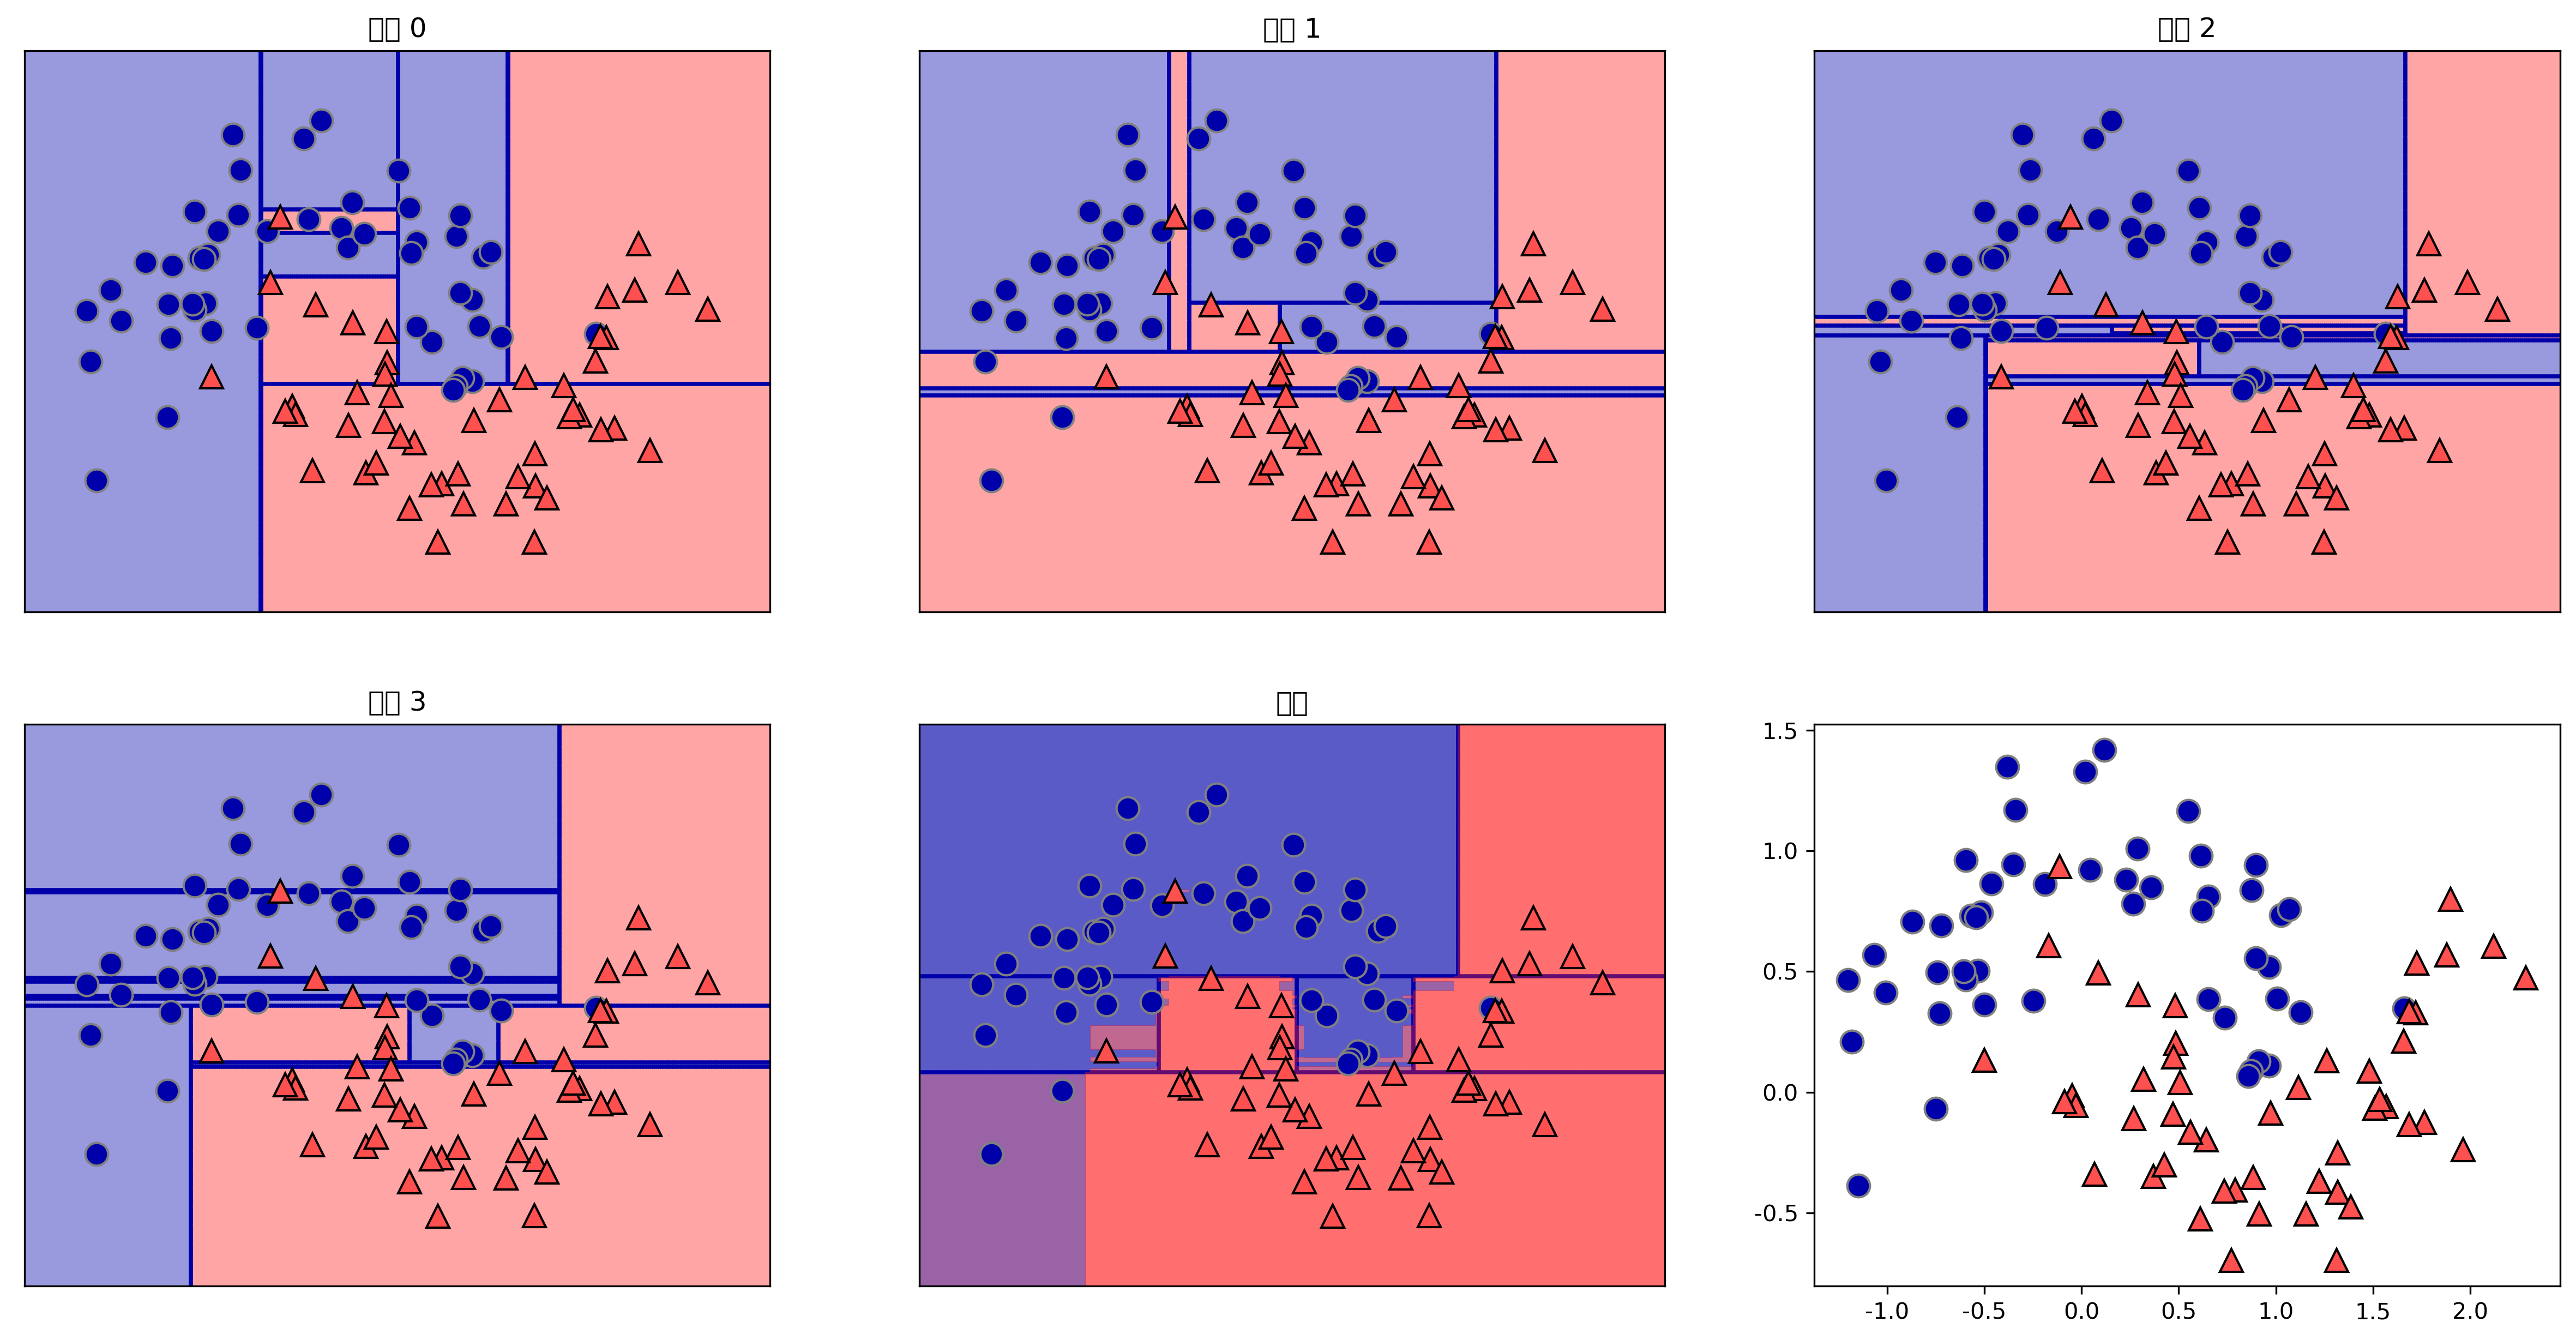

In [93]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,1], alpha=.4)
axes[-1,1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [96]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
                               oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

print("accuracy of trainingset:{:.3f}".format(bagging.score(Xc_train, yc_train)))
print("accuracy of testset: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("accuracy of OOBsample: {:.3f}".format(bagging.oob_score_))

accuracy of trainingset:1.000
accuracy of testset: 0.965
accuracy of OOBsample: 0.951
